In [48]:
import pandas
import rdkit
import os
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import PandasTools
from rdkit.Chem import rdDepictor

In [33]:
IPythonConsole.ipython_useSVG = True

In [34]:
df = pd.read_csv(os.path.join(os.pardir, 'xrefs.tsv'), sep='\t', index_col=0)
df = df.loc[df['Database'] == 'smiles', ['Database Identifier']]

In [35]:
PandasTools.AddMoleculeColumnToFrame(df, 'Database Identifier', 'Molecule', includeFingerprints=True)

In [49]:
for mol in df['Molecule']:
    if not mol.GetNumConformers():
        rdDepictor.Compute2DCoords(mol)

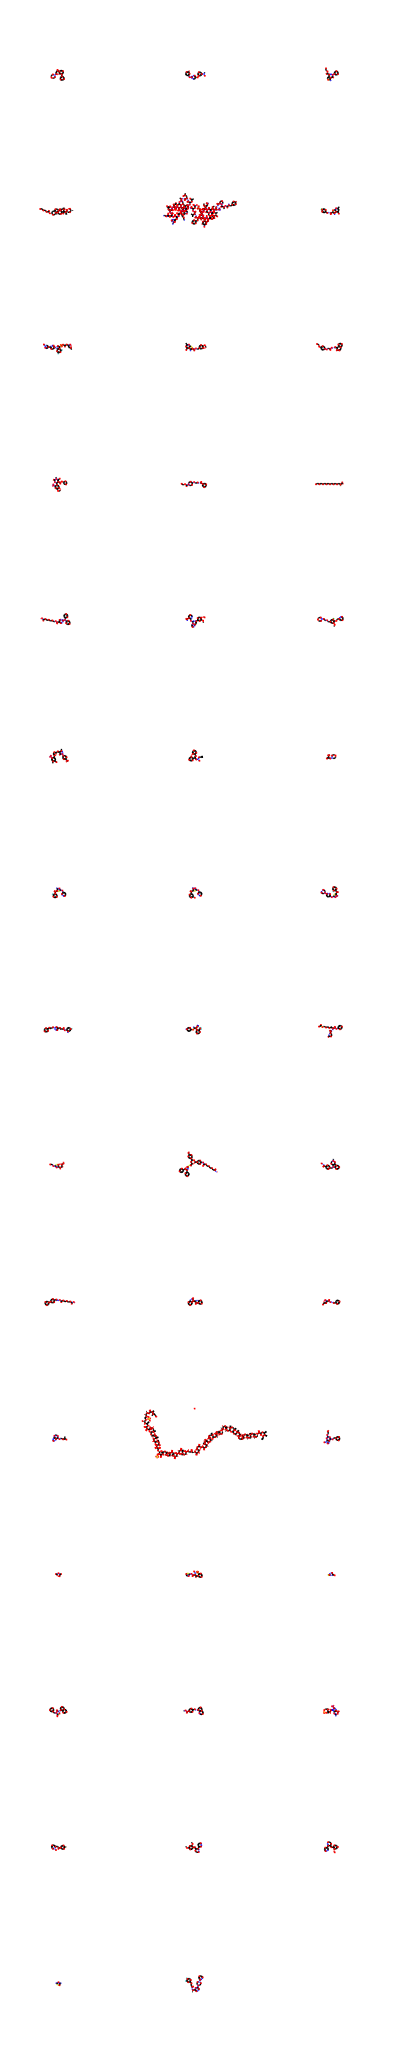

In [53]:
MolsToGridImage(
    df['Molecule'].tolist(), 
    #molsPerRow=4, 
    #subImgSize=(550, 550),
    useSVG=True
)